In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 50
tau = 0.019
L = 1.0
h = L/N
c = 1.0

print('Time to move one grid spacing is ',h/c)

coeff = -c*tau/(2.0*h)
coeff2 = c**2*tau**2/(2.0*h**2)

print ('Wave circles system in ', L/(c*tau),' steps.')

print ('Coefficient = ',coeff)
print ('Coefficient2 = ',coeff2)

print ('Lax stability criterion tau_max = ', h/c)

nStep = 10*round(L/(c*tau))

Time to move one grid spacing is  0.02
Wave circles system in  52.631578947368425  steps.
Coefficient =  -0.475
Coefficient2 =  0.45125
Lax stability criterion tau_max =  0.02


In [3]:
#
# Initial conditions
#
sigma = 0.1
k_wave = np.pi/sigma
x = np.arange(N)*h - L/2.0

a = np.empty(N)
for i in range(N):
    a[i]=np.cos(k_wave*x[i]) * np.exp(-x[i]**2/(2.0*sigma**2))
    
ip = np.arange(N) + 1
ip[N-1] = 0
im = np.arange(N) - 1
im[0] = N-1

In [4]:
iplot = 1
nplots = 50

In [5]:
aplot = np.empty((N,nplots))
tplot = np.empty(nplots)
aplot[:,0] = np.copy(a)
tplot[0] = 0
plotStep = nStep/nplots + 1

for istep in range(nStep):
    
    a[:] = a[:] + coeff*(a[ip]-a[im]) + coeff2*(a[ip]+a[im]-2.0*a[:])
    
    if (istep+1) % plotStep < 1:
        aplot[:,iplot] = np.copy(a)
        tplot[iplot] = (istep+1)*tau
        iplot += 1
        print (istep,' out of ',nStep,' steps completed')

11  out of  530  steps completed
23  out of  530  steps completed
34  out of  530  steps completed
46  out of  530  steps completed
57  out of  530  steps completed
69  out of  530  steps completed
81  out of  530  steps completed
92  out of  530  steps completed
104  out of  530  steps completed
115  out of  530  steps completed
127  out of  530  steps completed
139  out of  530  steps completed
150  out of  530  steps completed
162  out of  530  steps completed
173  out of  530  steps completed
185  out of  530  steps completed
197  out of  530  steps completed
208  out of  530  steps completed
220  out of  530  steps completed
231  out of  530  steps completed
243  out of  530  steps completed
255  out of  530  steps completed
266  out of  530  steps completed
278  out of  530  steps completed
289  out of  530  steps completed
301  out of  530  steps completed
313  out of  530  steps completed
324  out of  530  steps completed
336  out of  530  steps completed
347  out of  530  step

In [6]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

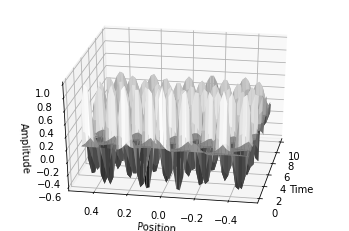

In [7]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
Tp, Xp = np.meshgrid(tplot[0:iplot], x)
ax.plot_surface(Tp,Xp,aplot[:,0:iplot],rstride=1,cstride=1,cmap=cm.gray)
ax.view_init(elev=30.,azim=190.)
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_zlabel('Amplitude')
plt.show()

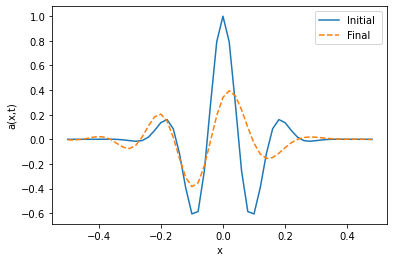

In [8]:
plt.plot(x,aplot[:,0],'-',x,a,'--')
plt.legend(['Initial ','Final'])
plt.xlabel('x')
plt.ylabel('a(x,t)')
plt.show()